# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Ruiqi Wang*
Netid:  *rw195*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**(a)**

In [6]:
from sklearn.datasets import make_blobs

#take a look at the dataset
X2, y2 = make_blobs(n_samples=500, n_features=2, centers=2, random_state=29)
X5, y5 = make_blobs(n_samples=500, n_features=2, centers=5, random_state=29)

In [7]:
X2.ndim

2

In [8]:
class kmeans:
    
    def __init__(self, k, max_iter=300, tol=1e-4, random_state=None):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
    
    def get_label(self, X):
        label = []
        for x in X:
            label.append(np.argmin(np.linalg.norm(self.centroid - x, axis=1)))    
            # dist=(np.linalg.norm(self.c - x, axis=1)), labels=(np.index(min(dist))) in two loops     
        return np.array(label)
        
    def get_centroid(self, X):  
        centroid = []
        for i in range(self.k):
            centroid.append(np.mean(X[np.where(self.label == i)], axis=0))
        return np.array(centroid)
   
    def fit(self, X):
        if self.random_state != None:
            np.random.seed(self.random_state)
        self.centroid = X[np.random.choice(X.shape[0], self.k, replace=False)]
        self.label = self.get_label(X)
        diff = 1
        i = 0
        
        while i < self.max_iter:
            while diff > self.tol:
                diff = np.max(np.linalg.norm(self.centroid - self.get_centroid(X), axis=1))
                self.centroid = self.get_centroid(X)
                self.label = self.get_label(X)          
            i+=1        
        return self
        
    def inertia(self, X):
        inertia = 0
        for i in range(X.shape[0]):
            inertia += np.linalg.norm(X[i] - self.centroid[self.label[i]])**2
        return inertia
    
    def predict(self, X):
        label = self.get_label(X)
        return label
        

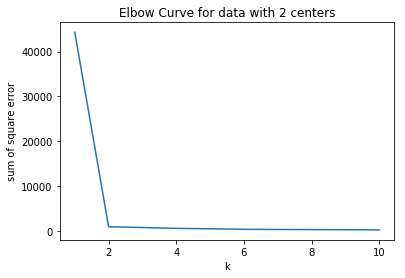

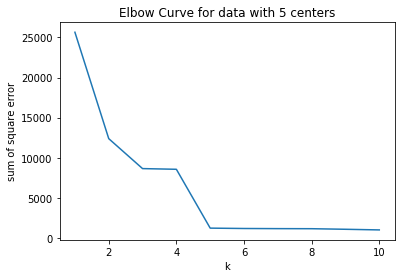

In [9]:
inertia = []

for i in range(1,11):
    inertia.append(kmeans(i, random_state = 29).fit(X2).inertia(X2))

plt.plot(np.arange(1,11), inertia)
plt.title('Elbow Curve for data with 2 centers')
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.show()

inertia = []

for i in range(1,11):
    inertia.append(kmeans(i,random_state = 29).fit(X5).inertia(X5))

plt.plot(np.arange(1,11), inertia)
plt.title('Elbow Curve for data with 5 centers')
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.show()

For the data with 2 centers, the elbow occures where k=2, because the value of sum of squared error drops significantly at k=2, and moves flat afterwards. For the data with 5 centers, the elbow occurces where k=5, because the value of sum of squared error drops significantly at k=5, and moves flat afterwards. These two results match the nature of the data. To be more specific, when the original data has k cluster centers, the sum of squared error drops most at the point when the number of clusters in the fitting model also equals to k. Afterwards, as k keeps increasing, the drop of SSE would not be obvious anymore as the cluster number will exceed the one of the original data.

**(b)**

1. K-means sets random cluster centers first and assign each data point to the cloest center. One advantage of kmeans is that it is computational simple.

2. Agglomerative clustering is bottom-up hierarchical (each data point starts to be one cluster of their own) and builds the clusters incrementally by combining similar data points.

3. GMM is a "soft" clustering method which assumes the data scources of each clusters are guassian distribution and it builds the clusters thruough Baysian rule and EM (expectation maximation) which randomly set k Guassian distributions at the beginning and adjust them according to the data points that are assigned to them.

4. DBSCAN is density-based and thus could dectect and ignore noises, but it have worse performance when the density of noise is compatable to non-noise data points.

5. Spectral clustering uses affinity matrix to define clusters instead of locations using demension reductions such as PCA.  

**(c)**

In [10]:
agg = np.loadtxt('./data/Aggregation.txt')
com = np.loadtxt('./data/Compound.txt')
d31 = np.loadtxt('./data/D31.txt')
jain = np.loadtxt('./data/jain.txt')

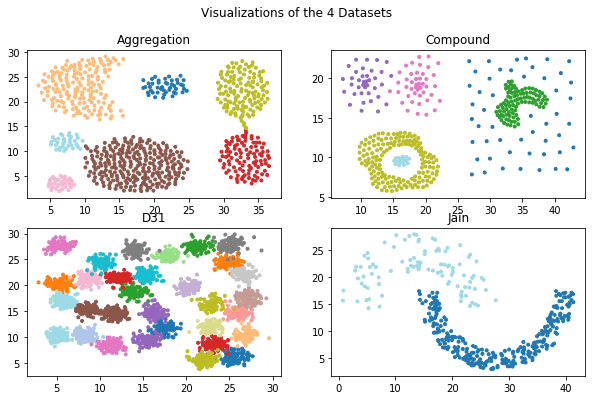

In [11]:
fig, axs = plt.subplots(2,2,figsize=(10,6))
axs[0,0].scatter(agg[:,0],agg[:,1], c = agg[:,2], marker = '.', cmap = 'tab20')
axs[0,0].set_title('Aggregation')
axs[0,1].scatter(com[:,0],com[:,1], c = com[:,2], marker = '.', cmap = 'tab20')
axs[0,1].set_title('Compound')
axs[1,0].scatter(d31[:,0],d31[:,1], c = d31[:,2], marker = '.', cmap = 'tab20')
axs[1,0].set_title('D31')
axs[1,1].scatter(jain[:,0],jain[:,1], c = jain[:,2], marker = '.', cmap = 'tab20')
axs[1,1].set_title('Jain')
fig.suptitle('Visualizations of the 4 Datasets')
plt.show()

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

In [13]:
data = [agg, com, d31, jain]
name = ['Aggregation', 'Compound', 'D31', 'Jain']
model = ['KMeans', 'AgglomerativeClustering', 'GaussianMixture', 'DBSCAN', 'SpectralClustering']
result = []

par_agg = [{'n_clusters':7, 'random_state':29}, {'n_clusters':7, 'linkage':'average'},{'n_components':7, 'random_state':29},
           {'eps':2, 'min_samples':14},{'n_clusters':7, 'random_state':29} ]

par_com = [{'n_clusters':6, 'random_state':29}, {'n_clusters':6},{'n_components':6, 'random_state':29},
           {'eps':1},{'n_clusters':6, 'random_state':29} ]

par_d31 = [{'n_clusters':31, 'random_state':29}, {'n_clusters':31},{'n_components':31, 'random_state':29},
           {'eps':0.4, 'min_samples':8},{'n_clusters':31, 'random_state':29} ]

par_jain = [{'n_clusters':2, 'random_state':29}, {'n_clusters':2, 'linkage':'average'},{'n_components':2, 'random_state':29},
           {'eps':2.5, 'min_samples':3},{'n_clusters':2, 'random_state':29} ]

parameters = [par_agg, par_com, par_d31, par_jain]

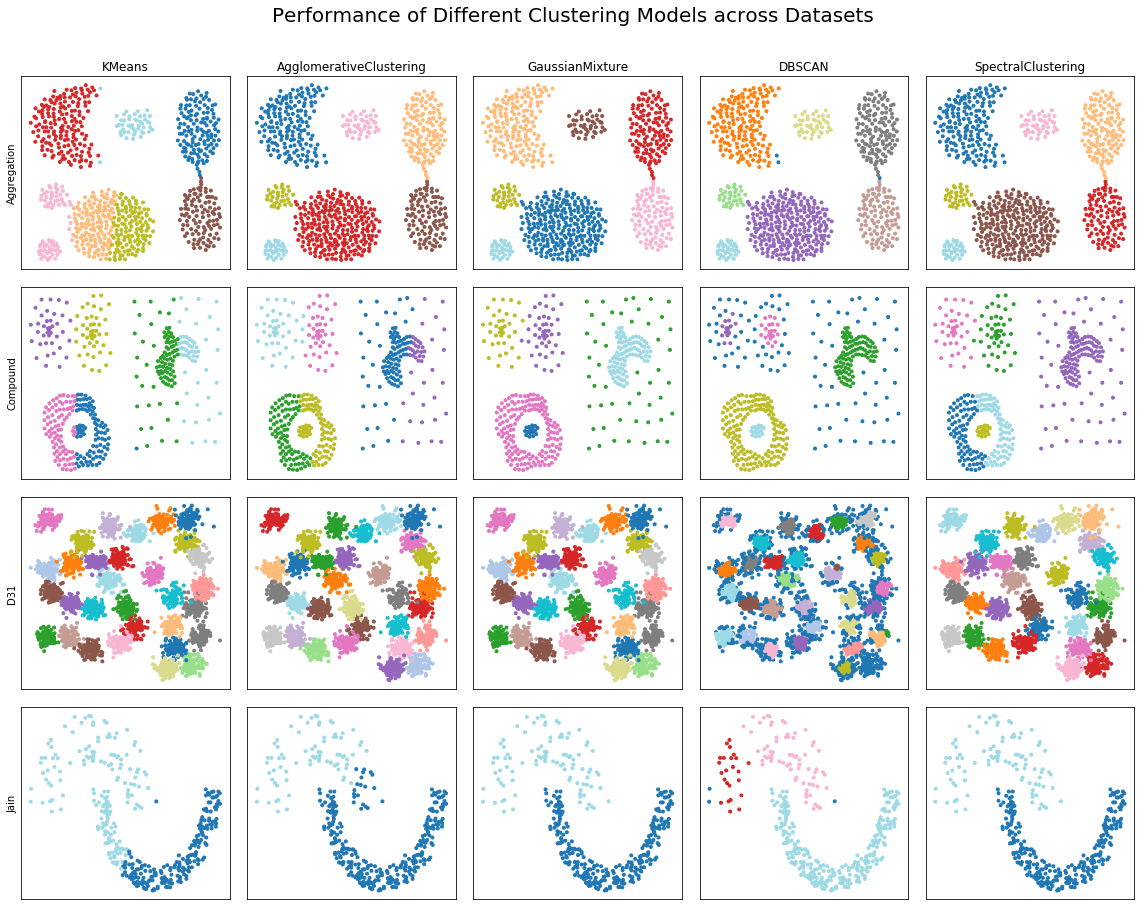

In [14]:
fig, axs = plt.subplots(4,5, figsize = (16,12))

for i in range(4):
    for j in range(5):
        if j != 2:
            axs[i,j].scatter(data[i][:,0], data[i][:,1], marker='.', cmap = 'tab20',
                             c=eval(model[j])(**parameters[i][j]).fit(data[i]).labels_)
        else:
            axs[i,j].scatter(data[i][:,0], data[i][:,1], marker='.', cmap = 'tab20',
                             c=eval(model[j])(**parameters[i][j]).fit(data[i]).predict(data[i]))
        if j == 0:
            axs[i,j].set_ylabel(name[i])
        if i == 0:
            axs[i,j].set_title(model[j])
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
fig.suptitle('Performance of Different Clustering Models across Datasets', y=1.05, fontsize = 20)
plt.tight_layout()
plt.show()

For Aggregation dataset, Agglomerative Clustering, GMM, and SpectralClustering work best, as the clusters in this dataset can be recognized through bottom-up structure, or Gaussian distribution, or affinity matrix. DBSCAN works well too, except for 2 data points are wrongly recognized as noise because the density there is relatively small. Kmeans works worst because it assums same deviations across clusters in the dataset. 

For Compound dataset, Gaussian work best, mostly because the distribution of the data points could apply to the assumption to the GMM model. Kmeans and Agglomerative Clustering work worst because the deviation in each clusters are different, and the clusters can not be generated by merging step by step.

For D31 dataset, all the models performs well except DBSCAN. The reason that most of the models perform well is that the clusters in this dataset are well divided, of similar deviation, connections, and distributions. However, as for DBSCAN, the data points in the outter part of each cluster are recoginized as noises due to smaller density.

For Jain dataset, Spectral Clustering works best because it recognized clusters according to the affinity level among data points, which mathches the feature of this dataset. DBSCAN performs worst here as it generates three separate clusters according to desity, and wrongly recognizes some data points as noises as well.

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

**(a)**

In [15]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

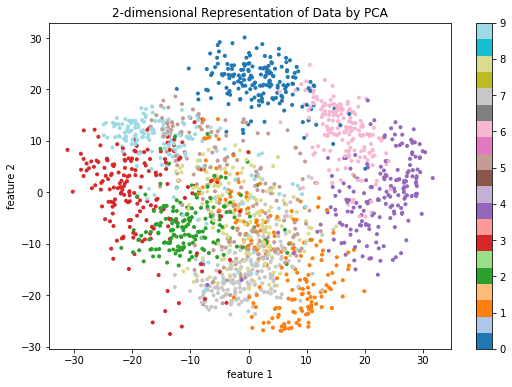

In [16]:
data = load_digits()

reduced = PCA(2).fit_transform(data.data)
plt.figure(figsize = (9,6))

plt.scatter(reduced[:, 0], reduced[:, 1], c=data.target, marker = '.', cmap='tab20')
plt.title('2-dimensional Representation of Data by PCA')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.colorbar()
plt.show()

**(b)**

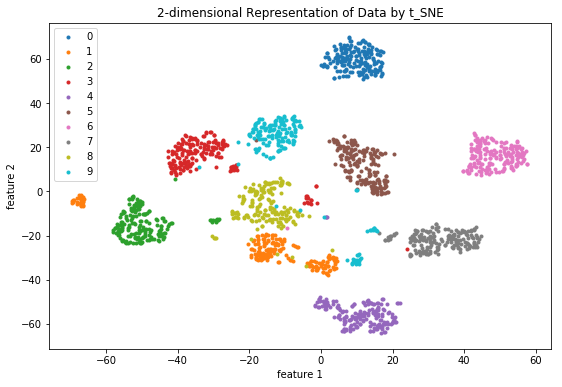

In [17]:
reduced = TSNE(2).fit_transform(data.data)
plt.figure(figsize = (9,6))

for label in data.target_names:
    plt.scatter(reduced[np.where(data.target == label),0], reduced[np.where(data.target == label),1], 
                label=label, marker = '.')
plt.title('2-dimensional Representation of Data by t_SNE')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

**(c)** 

From the two visualizations above, it can be seen that t-SNE is better at clustering than PCA on this dataset. The reason for this result is that t-NSE is a nonlinear dimensionality reduction technique, whereas PCA uses the correlation between dimensions and operates the data linearly. 

PCA is a mathemetic technique which calculates eigenvalues and eigenvectors of the matrix of the data.
- pros: reduce the size effectively; maintain more information than T-NSE; allows estimating probabilities of high-dimensinal data; renders a set of components that are uncorrelated
- cons: high computational cost

T-SNE is a probabilistic technique which minimizes the divergence between the distributions that measure similarities of the input objects and the one of the corresponding reduced output. 
- pros: works  particularly well in 2D and 3D reduction
- cons: slow and transductive 

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

**(a)**

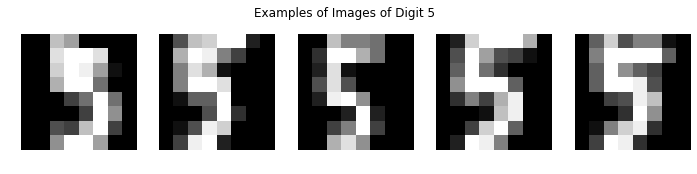

In [18]:
data5 = data.data[np.where(data.target == 5)]
img5 = data.images[np.where(data.target == 5)]

fig,axs = plt.subplots(1,5, figsize=(12,6))

for i in range(5):
    axs[i].imshow(img5[i], cmap='gray')
    axs[i].axis('off')

fig.suptitle('Examples of Images of Digit 5', y = 0.7)
plt.show()

**(b)**

In [19]:
fraction = []

for i in range(1, data.data.shape[1]+1):
    p = PCA(i)
    p.fit_transform(data5)
    fraction.append(np.sum(p.explained_variance_ratio_))

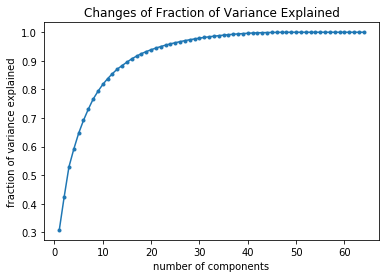

In [20]:
plt.plot(np.arange(1, data.data.shape[1]+1), fraction, marker = '.')
plt.title('Changes of Fraction of Variance Explained')
plt.xlabel('number of components')
plt.ylabel('fraction of variance explained')
plt.show()

**(c)**

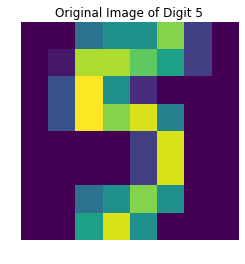

In [21]:
plt.imshow(img5[29])
plt.title('Original Image of Digit 5')
plt.axis('off')
plt.show()

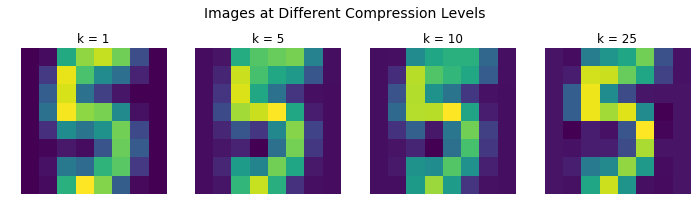

In [22]:
k = [1,5,10,25]

fig, axs = plt.subplots(1,4, figsize=(12,5))
for i, k in enumerate(k):
    p = PCA(k)
    reduced = p.fit_transform(data5)
    axs[i].imshow(p.inverse_transform(reduced)[29].reshape(8,8))
    axs[i].axis('off')
    axs[i].set_title('k = {}'.format(k))
fig.suptitle('Images at Different Compression Levels', fontsize = 14, y =0.82)
plt.show()

**(d)**

It can be told from the results above that the more principal components kept, the more the compressed image is true to the original one (when the number of components equla to N, there is no compression). On the other hand, the less principcal components kept, the higher level of compression (more memory-efficient at a cost of image distortion). The choice of the best number of components is a trade-off of the 2 things above.

 The compression levels of the 4 cases from k=1 to k=25 are as follows.
 
 $\frac{64- 1}{64} = 98.44\%$ This is the highest compression level, which save most of the momory but the compressed image is most distorted.
 
 $\frac{64- 5}{64} = 92.19\%$ The compression level of $92.19\%$ is also relatively high, and the images is much distorted, too. 
 
 $\frac{64-10}{64} = 84.38\%$ The compressed image is similar to the original one, but it does not save as much memory as the previous 2 images.
 
 $\frac{64-25}{64} = 60.94\%$ This compression has the lowest compression level but highest similarity to the original images, as can be seen from the visulizations above.

## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

In [20]:
def sigmoid(y):
    return 1/(1+np.exp(-y))
    
def d_sigmoid(y):
    return sigmoid(y) * (1. - sigmoid(y))

def cost(y, y_hat):
    return np.mean((y_hat-y)**2) / 2

def d_cost(y, y_hat):
    return y_hat-y

class NN():
    
    def __init__(self, epoch=5000, shuffle=True, lr = 0.0005, random_state=0):
        '''
             o    o
        o    o    o
          => o => o => o
        o    o    o
             o    o

        use sigmoid as activation function
        use MSE cost function
        use SGD optimizer
        '''
        
        self.epoch = epoch
        self.shuffle = shuffle
        self.lr = lr
        self.Weight = [np.random.uniform(-1,1,(5,2)), np.random.uniform(-1,1,(5,5)), np.random.uniform(-1,1,(1,5))]
        self.Bias = [np.random.uniform(-1,1,(5,1)), np.random.uniform(-1,1,(5,1)), np.random.uniform(-1,1,(1,1))]
        np.random.seed(random_state)
        
    
    
    def fit(self, X, y):

        batch_index = np.arange(X.shape[0])
        if self.shuffle:
            np.random.shuffle(batch_index)
        for k in range(self.epoch):
            #print(">"*10+" Epoch %d"%k)
            C = []
            for i in batch_index:
                c = self.fit_one_batch(X[i].reshape(2,1), y[i].reshape(1,1))
                C.append(c)
            #if k % 10 == 0:
                #print(">"*10+" Epoch %d"%k)
                #print("  Training Error: %10.4f" % np.mean(C))
        return self
    
    def fit_one_batch(self, batch_x, batch_y):
        Y, Z, C = self.forward_prop(batch_x, batch_y)
        self.backward_prop(batch_y, Y, Z)
        return C
    
    

    
    def forward_prop(self, x, y=None, cal_cost=True):
        '''
        using sigmoid activation
        '''
        Y = []
        Z = [x]
        for w, b in zip(self.Weight, self.Bias):
            y = np.dot(w, Z[-1]) + b
            z = sigmoid(y)
            Y.append(y)
            Z.append(z)            
        if cal_cost:
            C = cost(z, y)
            return Y, Z, C
        else:
            return Z[-1]


    def backward_prop(self, y, Y, Z):

        dW = []
        dB = []
        dy = d_cost(y, Z[-1]) * d_sigmoid(Y[-1])
        dw = np.dot(dy, Z[-2].T)
        db = np.mean(dy, axis=1, keepdims=True)
        dW.append(dw)
        dB.append(db)
        for i in range(2, len(self.Weight)+1):
            dy = np.dot(self.Weight[-i+1].T, dy) * d_sigmoid(Y[-i])
            dw = np.dot(dy, Z[-i-1].T)
            db = np.mean(dy, axis=1, keepdims=True)
            dW.append(dw)
            dB.append(db)
        
        W_new = []
        B_new = []
        
        '''
        for ww, bb, dww, dbb in zip(self.Weight, self.Bias, dW[::-1], dB[::-1]):
            print("w:\n", ww.shape)
            print("b:\n", bb.shape)
            print("dw:\n", dww.shape)
            print("db:\n", dbb.shape)
        '''

        for i in range(len(self.Weight)):
            W_new.append(self.Weight[i] - self.lr * dW[-i-1])
            B_new.append(self.Bias[i] - self.lr * dB[-i-1])
        
        self.Weight = W_new
        self.Bias = B_new
                 

    def predict_proba(self, X):
        return self.forward_prop(X.T, cal_cost=False).flatten()
    
    
    def predict(self, X):
        y_hat = self.predict_proba(X)
        thres = np.median(y_hat)
        y_class = np.zeros(X.shape[0])
        y_class[y_hat > thres] = 1
        return y_class

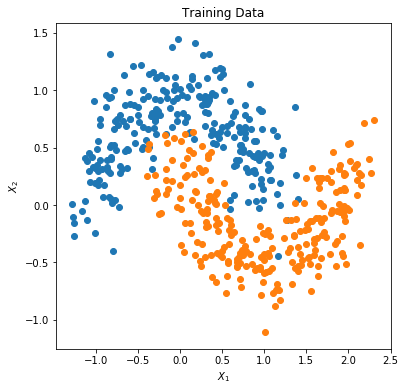

In [21]:
from sklearn.datasets import make_moons
np.random.seed(0)
N_train = 500
N_test = 100

data_train = make_moons(N_train, noise=0.2)
data_test = make_moons(N_test, noise=0.2)

pos0 = np.where(data_train[1] == 0)
pos1 = np.where(data_train[1] == 1)
plt.figure(figsize=(6,6))
plt.scatter(data_train[0][pos0,0], data_train[0][pos0,1], label=0)
plt.scatter(data_train[0][pos1,0], data_train[0][pos1,1], label=1)
plt.title("Training Data")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [ ]:
nnc = NN(epoch=5000, lr=0.0001, random_state=0).fit(data_train[0], data_train[1])
train_y_hat = nnc.predict_proba(data_train[0])
train_y_class = nnc.predict(data_train[0])
test_y_hat = nnc.predict_proba(data_test[0])
test_y_class = nnc.predict(data_test[0])


from matplotlib import cm

N_grid = 501
grid_x = np.linspace(-2, 3, N_grid)
grid_y = np.linspace(-2, 2, N_grid)
XX, YY = np.meshgrid(grid_x, grid_y)
x_pre = np.stack((XX.flatten(), YY.flatten()), axis = -1)
y_pre = nnc.predict_proba(x_pre).reshape(N_grid, N_grid)

fig, axs = plt.subplots(1,2, figsize=(16,8))
ax = axs.flatten()

pos0 = np.where(train_y_class == 0)
pos1 = np.where(train_y_class == 1)
cset = ax[0].contourf(XX, YY, y_pre, cmap=cm.coolwarm)
ax[0].contour(cset, colors = 'k')
ax[0].scatter(data_train[0][pos0,0], data_train[0][pos0,1], label=0)
ax[0].scatter(data_train[0][pos1,0], data_train[0][pos1,1], label=1)
ax[0].set_title("Training", fontsize=16)
ax[0].set_xlabel("$X_1$", fontsize=16)
ax[0].set_ylabel("$X_2$", fontsize=16)
ax[0].legend()

pos0 = np.where(test_y_class == 0)
pos1 = np.where(test_y_class == 1)
cset = ax[1].contourf(XX, YY, y_pre, cmap=cm.coolwarm)
ax[1].contour(cset, colors = 'k')
ax[1].scatter(data_test[0][pos0,0], data_test[0][pos0,1], label=0)
ax[1].scatter(data_test[0][pos1,0], data_test[0][pos1,1], label=1)
ax[1].set_title("Testing", fontsize=16)
ax[1].set_xlabel("$X_1$", fontsize=16)
ax[1].set_ylabel("$X_2$", fontsize=16)
ax[1].legend()

plt.suptitle("Decision Boundary for Training and Testing Results", y=1.03, fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(data_test[1], test_y_hat, pos_label=1)

plt.plot(fpr, tpr)
plt.title("ROC Curve for the Testing Dataset")
plt.show()

I could have implemented a flexible structure of hidden layers, using a tuple whose elements is the size of each hidden layers. I could also implemented more activation and cost function, such as ReLu and cross-entropy in the future.